In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

### Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

In [4]:
# Get the crowdfunding_info_df columns.
crowdfunding_columns = crowdfunding_info_df.columns.tolist()
crowdfunding_columns

['cf_id',
 'contact_id',
 'company_name',
 'blurb',
 'goal',
 'pledged',
 'outcome',
 'backers_count',
 'country',
 'currency',
 'launched_at',
 'deadline',
 'staff_pick',
 'spotlight',
 'category & sub-category']

In [5]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category', 'subcategory']] = \
crowdfunding_info_df['category & sub-category'].str.split('/', n=2, expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [6]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique().tolist()
subcategories = crowdfunding_info_df['subcategory'].unique().tolist()

print(f'categories list: {categories} \n')
print('-'*100 + '\n')
print(f'categories list: {subcategories}')

categories list: ['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism'] 

----------------------------------------------------------------------------------------------------

categories list: ['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
# categories = np.arange(1,10)
# subcategories = np.arange(1,25)

print(len(categories))
print(len(subcategories))

9
24


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = []

for x in category_ids:
    cat_ids.append(f'cat{x}')
    
# Use a list comprehension to add "subcat" to each subcategory_id.    
subcat_ids = []

for y in subcategory_ids:
    subcat_ids.append(f'subcat{y}')
    
print(f'category_ids: {cat_ids}\n')
print('-'*100 + '\n')
print(f'subcategory_ids: {subcat_ids}')

category_ids: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']

----------------------------------------------------------------------------------------------------

subcategory_ids: ['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [10]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({'category_id': cat_ids, 'category': categories})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({'subcategory_id': subcat_ids,\
                              'subcategory': subcategories})

In [11]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [12]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [13]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [14]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [15]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launch_date', 'deadline': 'end_date'}, inplace=True)
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300,153216,successful,2043,US,USD,1609221600,1622350800,False,True,food/food trucks,food,food trucks
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600,4814,failed,112,US,USD,1634274000,1638252000,False,False,theater/plays,theater,plays
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600,4603,canceled,139,IT,EUR,1636174800,1639116000,False,False,theater/plays,theater,plays
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600,37823,failed,374,US,USD,1602133200,1618117200,False,True,music/indie rock,music,indie rock


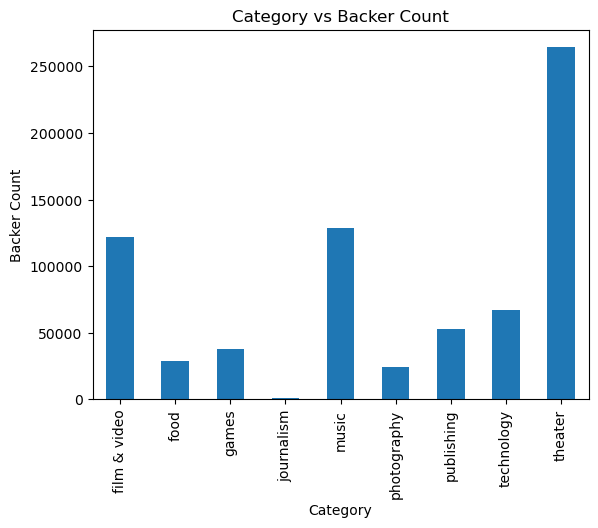

In [21]:
# Create a bar graph that displays the money backer_count for each category
category_counts = campaign_df[["category", "backers_count"]] 
category_counts = campaign_df.groupby("category") ["backers_count"].sum()
category_counts.plot.bar(x='category', y='backer_count')  # Specify x and y columns
plt.xlabel("Category")
plt.ylabel("Backer Count")
plt.title("Category vs Backer Count")
plt.show()


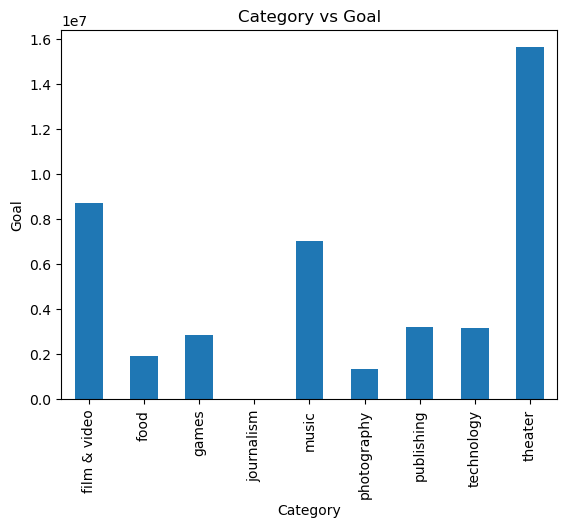

In [22]:
# Create a bar graph that displays the goal for each category 
category_goal = campaign_df[["category", "goal"]] 
category_goal = campaign_df.groupby("category") ["goal"].sum()
category_goal.plot.bar(x='category', y='goal')  
plt.xlabel("Category")
plt.ylabel("Goal")
plt.title("Category vs Goal")
plt.show()


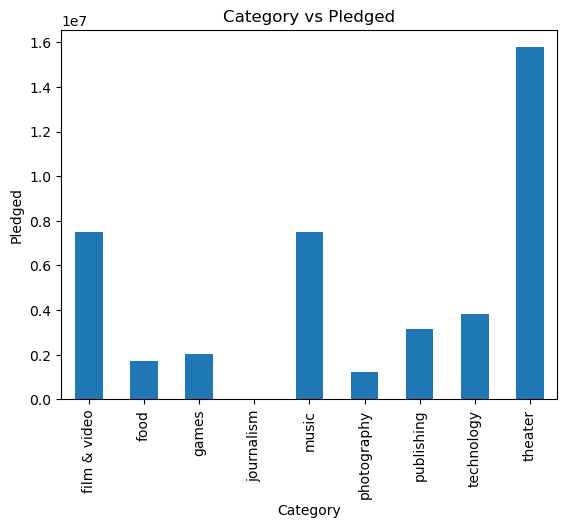

In [23]:
# Create a bar graph that displays the amount pledged for each category 
category_pledged = campaign_df[["category", "pledged"]] 
category_pledged = campaign_df.groupby("category") ["pledged"].sum()
category_pledged.plot.bar(x='category', y='pledged')  
plt.xlabel("Category")
plt.ylabel("Pledged")
plt.title("Category vs Pledged")
plt.show()

In [ ]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)

campaign_df['pledged'] = campaign_df['pledged'].astype(float)

#campaign_df['category'] = campaign_df['category'].astype(int)
#campaign_df['subcategory'] = campaign_df['subcategory'].astype(int)

In [ ]:
# Check the datatypes
campaign_df.info()

In [ ]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt

campaign_df['launch_date'] = pd.to_datetime(campaign_df['launch_date'])
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'])

campaign_df.info()

In [ ]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
category_df['category'] = category_df['category'].astype(str)
subcategory_df['subcategory'] = subcategory_df['subcategory'].astype(str)

campaign_and_category = pd.merge(campaign_df, category_df, on="category")

campaign_merged_df = pd.merge(campaign_and_category, subcategory_df, on ="subcategory")

campaign_merged_df.info()

In [ ]:
# Drop unwanted columns
campaign_merged_df.drop(columns = ['staff_pick', 'spotlight', 'category & sub-category', 'category', 'subcategory'], inplace=True)
campaign_merged_df

In [ ]:
# Export the DataFrame as a CSV file. 
campaign_merged_df.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [ ]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

In [ ]:
contact_info_df.columns

### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [ ]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json

dict_values = []

for i,row in contact_info_df.iterrows():
    
    data = row['contact_info']
    dict_contacts = json.loads(data)
#     print(dict_contacts)
    dict_columns = [v for k,v in dict_contacts.items()]
    dict_values.append(dict_columns)


# Print out the list of values for each row.
print(dict_values)

In [ ]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contacts_df= pd.DataFrame(dict_values, columns = ['contact_id','name', 'email'])
contacts_df.head()

In [ ]:
# Check the datatypes.
contacts_df.info()

In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 

contacts_df[['first_name','last_name']] = contacts_df["name"].str.split(' ', expand=True)

# contacts_df['first_name'] = contacts_df['name'].str.split(' ').str[0]
# contacts_df['last_name'] = contacts_df['name'].str.split(' ').str[0]


# Drop the contact_name column
contacts_df.drop('name', axis=1, inplace=True)
contacts_df.head()

In [ ]:
# Reorder the columns
clean_contacts_df = contacts_df[['contact_id', 'first_name', 'last_name', 'email']]
clean_contacts_df.head()

In [ ]:
# Check the datatypes one more time before exporting as CSV file.
clean_contacts_df.info()

In [ ]:
# Export the DataFrame as a CSV file. 
clean_contacts_df.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [ ]:
contact_info_df_copy = contact_info_df.copy()
contact_info_df_copy.head()

In [ ]:
# Extract the four-digit contact ID number.


In [ ]:
# Check the datatypes.


In [ ]:
# Convert the "contact_id" column to an int64 data type.


In [ ]:
# Extract the name of the contact and add it to a new column.


In [ ]:
# Extract the email from the contacts and add the values to a new column.


In [ ]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.


In [ ]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 


# Drop the contact_name column


In [ ]:
# Reorder the columns


In [ ]:
# Check the datatypes one more time before exporting as CSV file.


In [ ]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)